In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("TikTok_songs_2022.csv")

In [14]:
df.shape

(263, 18)

In [16]:
df.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

## Visualization

In [20]:
colors = ["#09101F","#72DDF7", '#F7AEF8']

In [46]:
def hist(df, x, ax, main_color=colors[1], second_color=colors[0], bins=30):
    sns.histplot(
        data=df,
        x=x,
        bins=bins,
        ax=ax,
        kde=True,
        color=main_color,
        edgecolor=second_color,
        line_kws={"linestyle": '--'},
        linewidth=3
    )

    ax.lines[0].set_color(second_color)
    ax.grid(axis='y', linewidth=0.3, color='black')
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

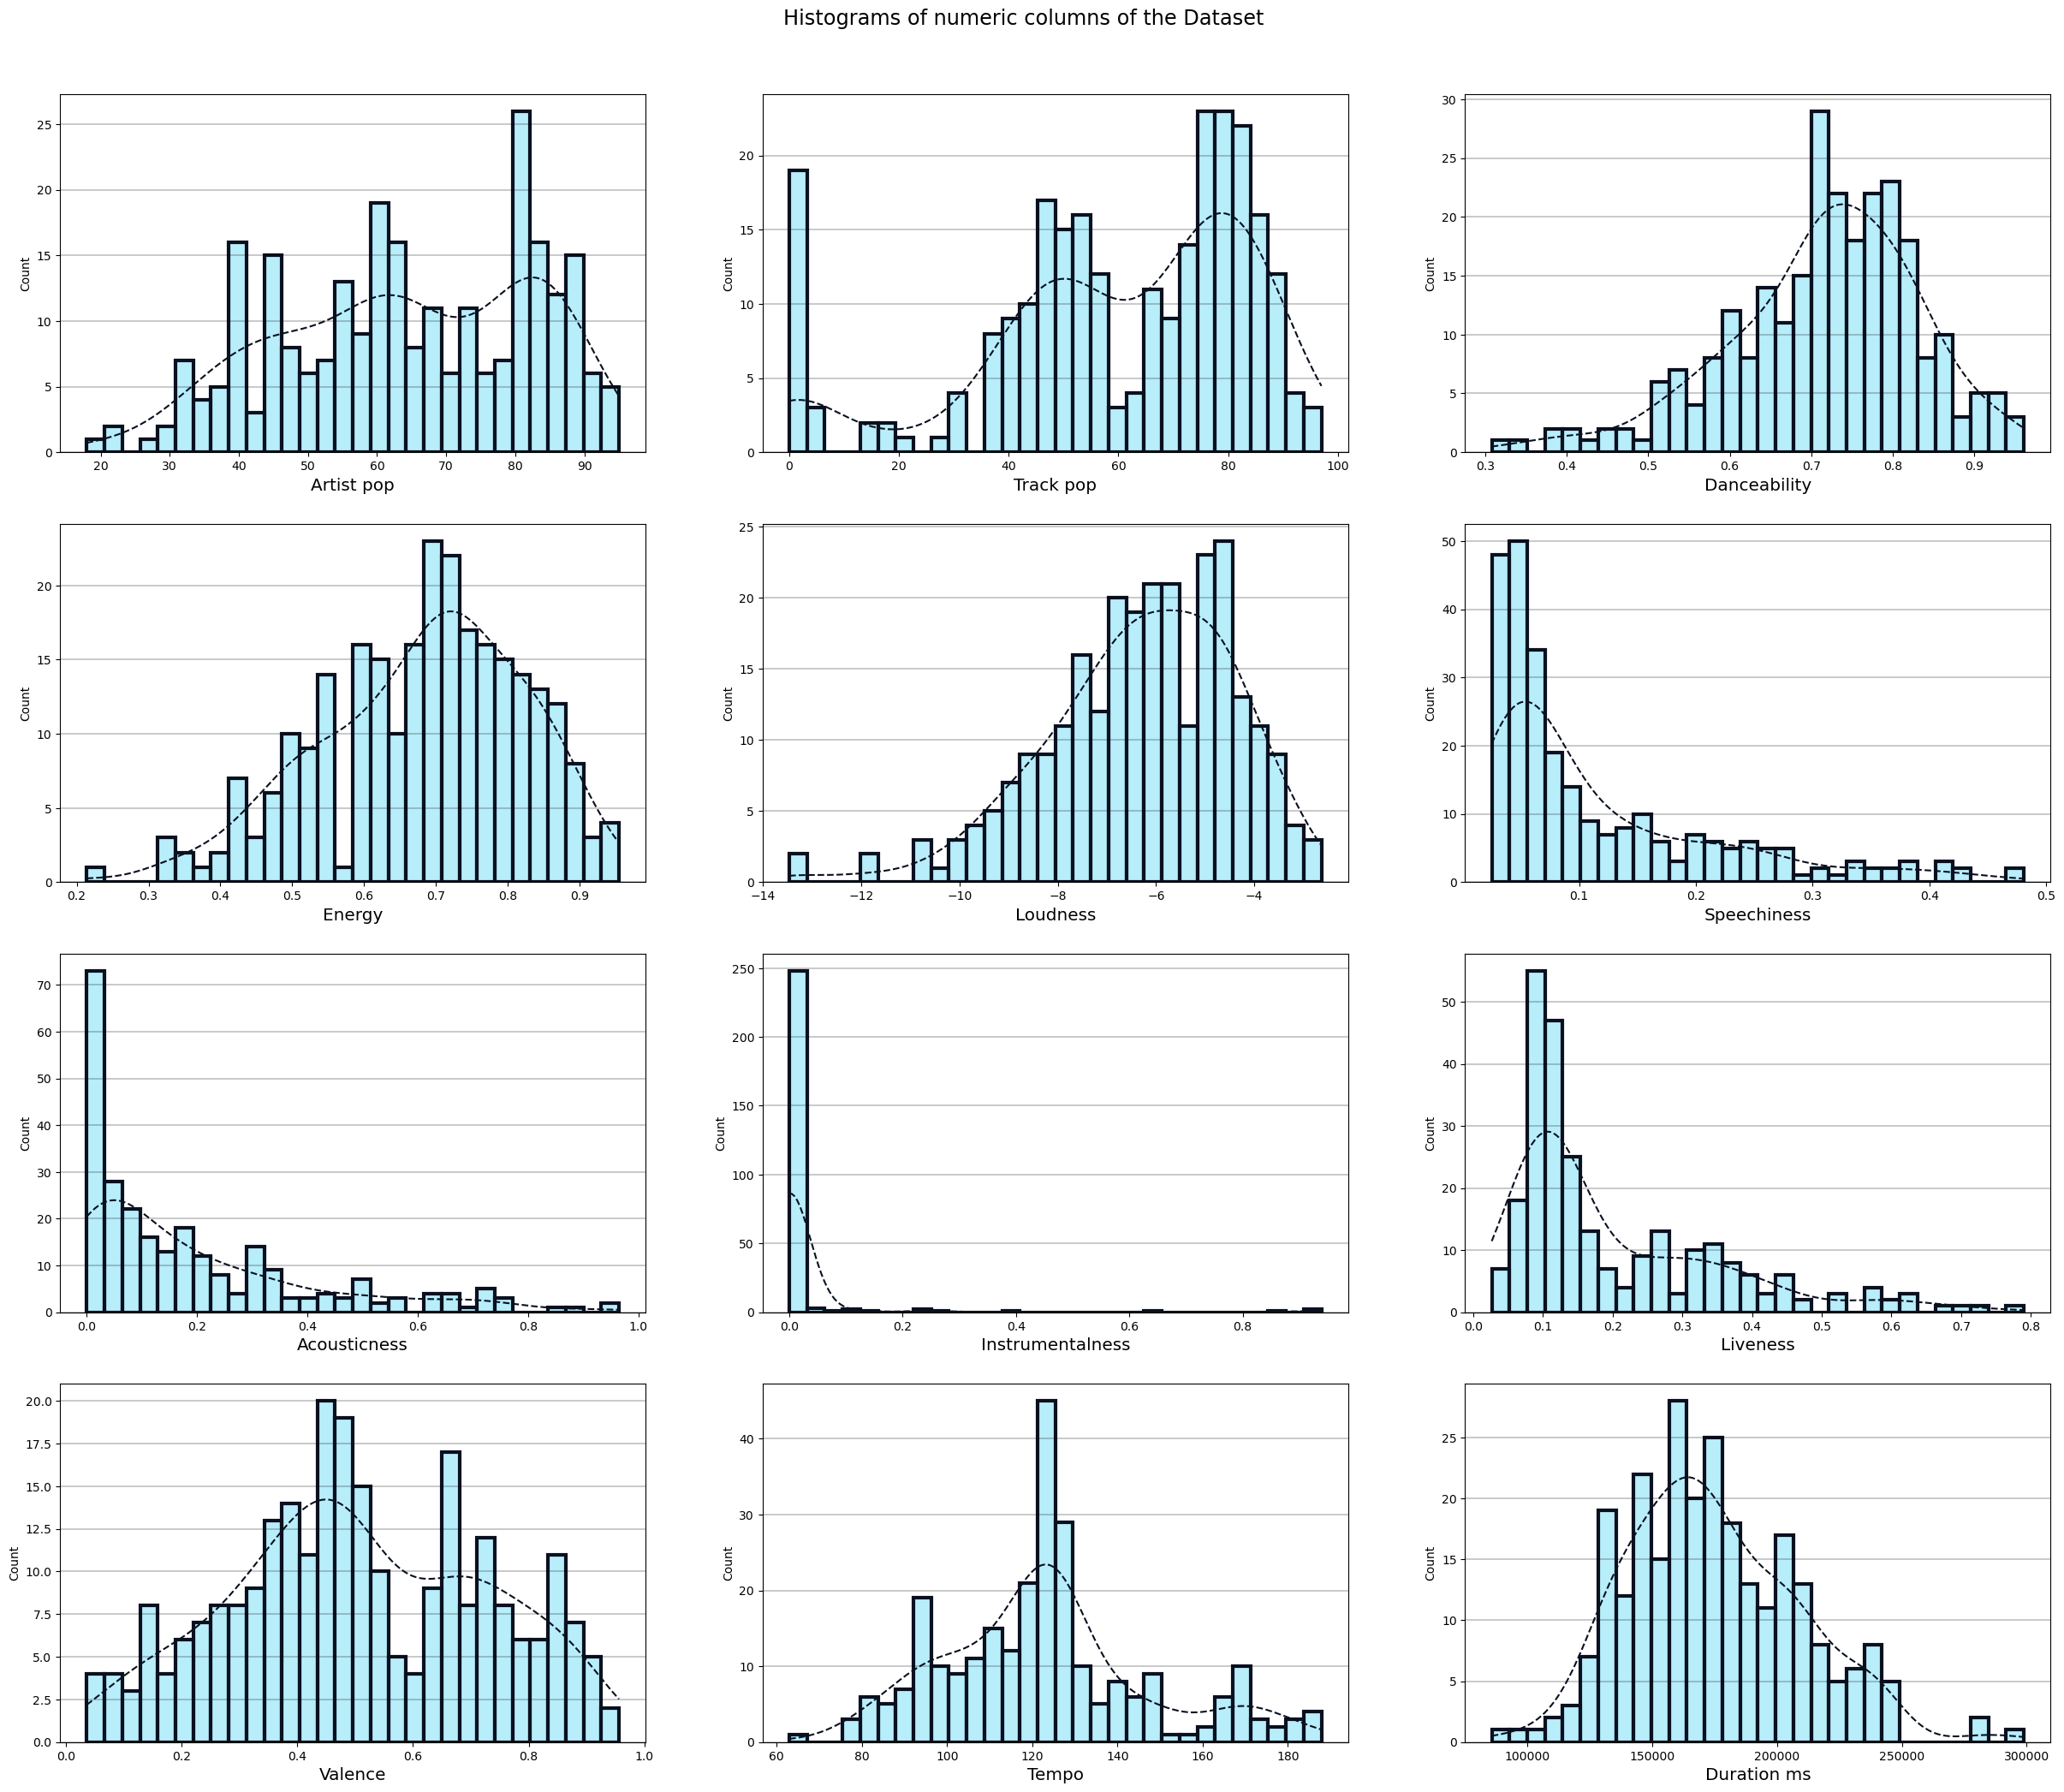

In [48]:
cols = ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(4, 3, figsize=(30, 25))

for i, col in enumerate(cols):
    row_index = i // 3
    col_index = i % 3
    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of numeric columns of the Dataset", fontsize="xx-large", y=0.92)
plt.show()

In [62]:
def count(df, x, ax, main_color=colors[2], second_color=colors[0]):
    ax.bar(df[x].value_counts().index, 
           df[x].value_counts().values,
           color=main_color, 
           edgecolor=second_color, 
           linewidth=3)
    ax.grid(axis='y', linewidth=0.3, color='black')
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

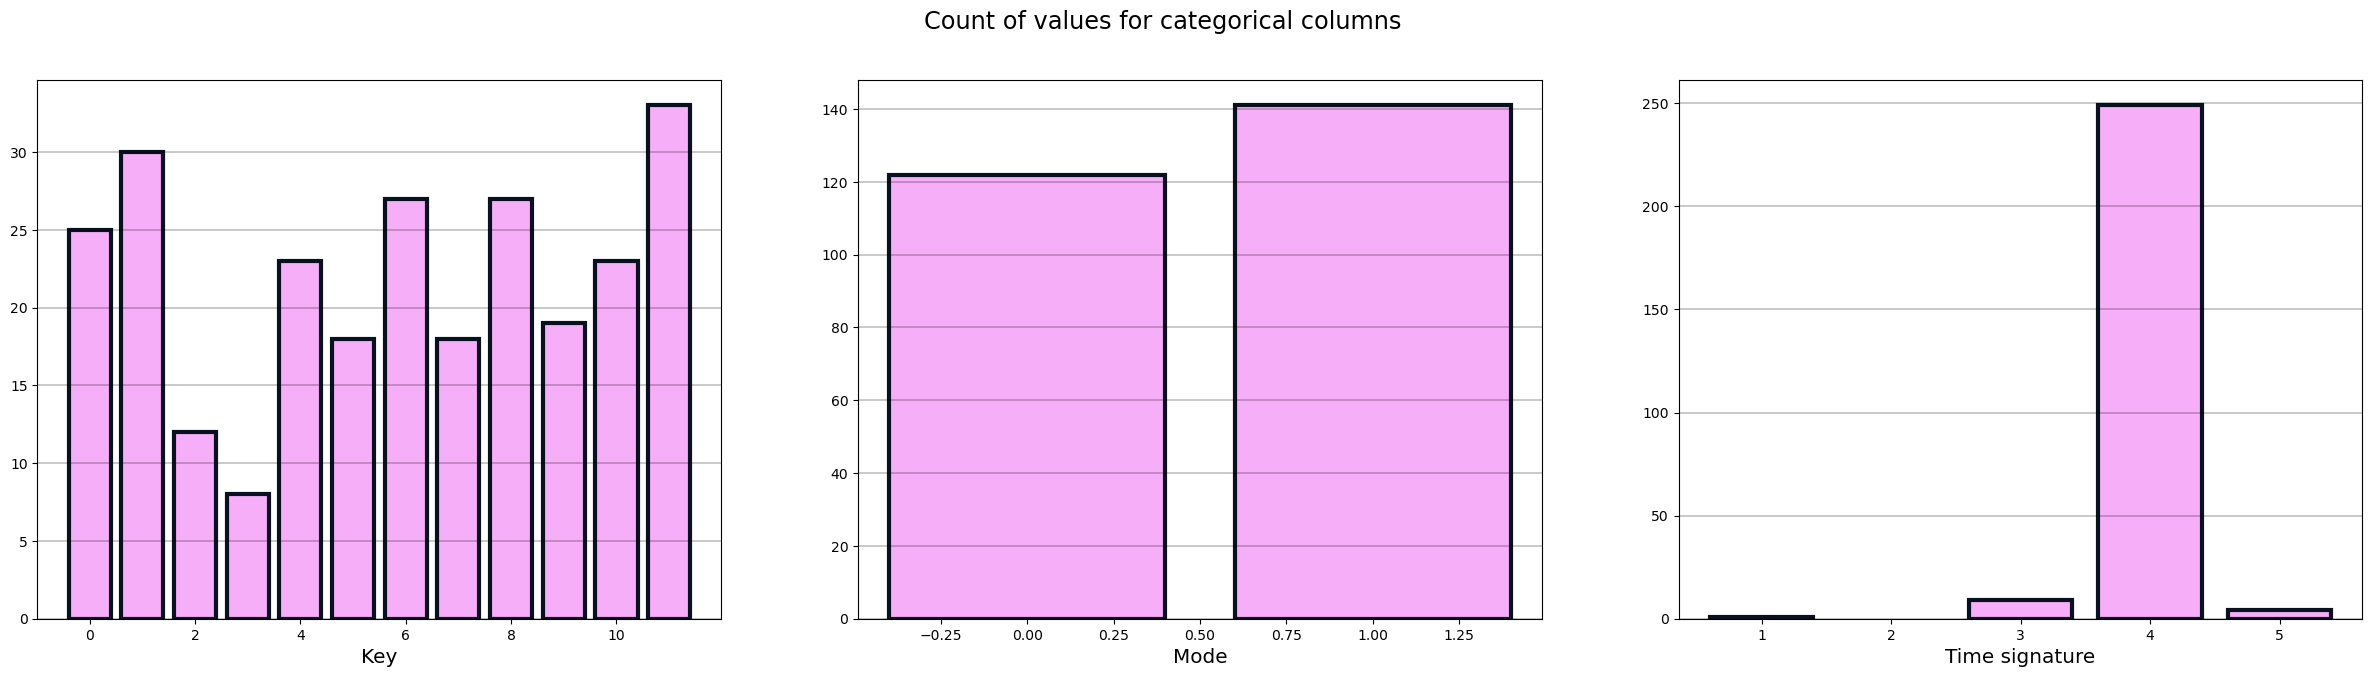

In [64]:
cols = ['key', 'mode', 'time_signature']

fig, ax = plt.subplots(1, 3, figsize=(30, 7))

for i, col in enumerate(cols):
    count(df, col, ax[i])
    
fig.suptitle("Count of values for categorical columns", size="xx-large")
plt.show()

## Correlation with track_pop

In [73]:
df.loc[df["track_pop"] == 0,'track_pop'] = df['track_pop'].mean() 

In [75]:
def scatter(df, x, y, ax, main_color=colors[1], second_color=colors[0]):
    sns.regplot(data=df, 
                x=x, 
                y=y, 
                ax=ax, 
                color=main_color, 
                ci=75,
                scatter_kws={
                    'edgecolor':second_color,
                    'linewidths':1.5,
                    's':50
                },
                line_kws={
                    'color':colors[2],
                    'linewidth':3,
                }
               )
    ax.set_xlabel(x.replace("_", " ").capitalize())
    ax.set_ylabel(y.replace("_", " ").capitalize())
    
    sns.despine(ax=ax)
    ax.grid(axis='x')

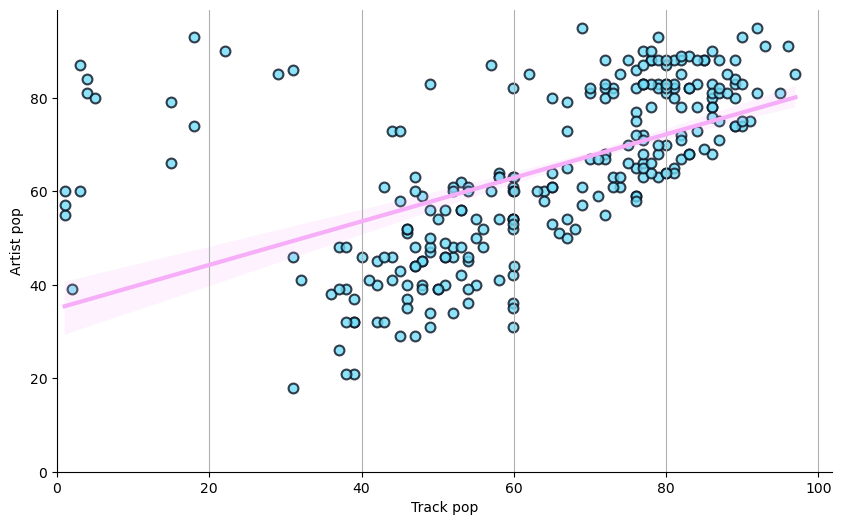

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter(df, 'track_pop', 'artist_pop', ax)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.show()